In [1]:
import os
import pandas as pd   # importing and manipulating data
import numpy as np    # for performing linear algebric functions
import matplotlib.pyplot as plt    #visualization of data
plt.style.use('ggplot')
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [2]:
depressed_tweets_df = pd.read_csv('E:/Project 5 credits/Final Project/depressive tweets before/depressed.csv',  sep='\t')
depressed_tweets_df.head()


id      conversation_id  \
0  1372013657807290369  1372013657807290369   
1  1372013653914906625  1372010501492850696   
2  1372013644083519489  1372013644083519489   
3  1372013626303778818  1372013626303778818   
4  1372013588399939584  1371990105091678211   

                                    created_at        date      time  \
0  2021-03-17 08:05:21 Sri Lanka Standard Time  2021-03-17  08:05:21   
1  2021-03-17 08:05:20 Sri Lanka Standard Time  2021-03-17  08:05:20   
2  2021-03-17 08:05:18 Sri Lanka Standard Time  2021-03-17  08:05:18   
3  2021-03-17 08:05:13 Sri Lanka Standard Time  2021-03-17  08:05:13   
4  2021-03-17 08:05:04 Sri Lanka Standard Time  2021-03-17  08:05:04   

   timezone              user_id        username             name place  ...  \
0       530   955836289709944832  msbryantimages     Britt Bryant   NaN  ...   
1       530             74573639  sharksandswain         Sarah 🦈🎶   NaN  ...   
2       530  1336398104866795522      shadic_627        Shadic627   NaN  ...   
3       530  1328090774081130496      evilmilkis          Cactass   NaN  ...   
4       530  1157231227293900800   empressmish13  🌸ₘ.ₐ. ₗₐₚᵢₙₛₖᵢ🌸   NaN  ...   

  geo source user_rt_id user_rt retweet_id  \
0 NaN    NaN        NaN     NaN        NaN   
1 NaN    NaN        NaN     NaN        NaN   
2 NaN    NaN        NaN     NaN        NaN   
3 NaN    NaN        NaN     NaN        NaN   
4 NaN    NaN        NaN     NaN        NaN   

                                            reply_to  retweet_date  translate  \
0                                                 []           NaN        NaN   
1  [{'screen_name': 'subtextiel', 'name': 'Dmitri...           NaN        NaN   
2                                                 []           NaN        NaN   
3                                                 []           NaN        NaN   
4  [{'screen_name': 'Jim_Jordan', 'name': 'Rep. J...           NaN        NaN   

  trans_src trans_dest  
0       NaN        NaN  
1       NaN        NaN  
2       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN  

[5 rows x 36 columns]

In [3]:
depression_tweets_df = pd.read_csv('E:/Project 5 credits/Final Project/depressive tweets before/depression.csv',  sep='\t')
anxiety_tweets_df = pd.read_csv('E:/Project 5 credits/Final Project/depressive tweets before/anxiety.csv',  sep='\t')
overwhelmed_tweets_df = pd.read_csv('E:/Project 5 credits/Final Project/depressive tweets before/overwhelmed.csv',  sep='\t')
exhausted_tweets_df = pd.read_csv('E:/Project 5 credits/Final Project/depressive tweets before/exhausted.csv',  sep='\t')
anxious_tweets_df = pd.read_csv('E:/Project 5 credits/Final Project/depressive tweets before/anxious.csv',  sep='\t')
tired_tweets_df = pd.read_csv('E:/Project 5 credits/Final Project/depressive tweets before/tired.csv',  sep='\t')
discouraged_tweets_df = pd.read_csv('E:/Project 5 credits/Final Project/depressive tweets before/discouraged.csv',  sep='\t')
demotivated_tweets_df = pd.read_csv('E:/Project 5 credits/Final Project/depressive tweets before/demotivated.csv',  sep='\t')
worried_tweets_df = pd.read_csv('E:/Project 5 credits/Final Project/depressive tweets before/worried.csv',  sep='\t')
lonely_tweets_df = pd.read_csv('E:/Project 5 credits/Final Project/depressive tweets before/lonely.csv',  sep='\t')
sad_tweets_df = pd.read_csv('E:/Project 5 credits/Final Project/depressive tweets before/sad.csv',  sep='\t')
hopeless_tweets_df = pd.read_csv('E:/Project 5 credits/Final Project/depressive tweets before/hopeless.csv',  sep='\t')

df_depressive_reindex = pd.concat([depressed_tweets_df,depression_tweets_df,anxiety_tweets_df,overwhelmed_tweets_df,
                            exhausted_tweets_df,anxious_tweets_df,tired_tweets_df,discouraged_tweets_df,demotivated_tweets_df,
                           worried_tweets_df,lonely_tweets_df, sad_tweets_df, hopeless_tweets_df], ignore_index=True)

df_depressive_reindex

c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id      conversation_id  \
0       1372013657807290369  1372013657807290369   
1       1372013653914906625  1372010501492850696   
2       1372013644083519489  1372013644083519489   
3       1372013626303778818  1372013626303778818   
4       1372013588399939584  1371990105091678211   
...                     ...                  ...   
251025  1371519987110744064  1371519984078266368   
251026  1371519939757105165  1371519939757105165   
251027  1371519939388002310  1371518972206661632   
251028  1371519895104589824  1371518299209613316   
251029  1371519888221634561  1371519888221634561   

                                         created_at        date      time  \
0       2021-03-17 08:05:21 Sri Lanka Standard Time  2021-03-17  08:05:21   
1       2021-03-17 08:05:20 Sri Lanka Standard Time  2021-03-17  08:05:20   
2       2021-03-17 08:05:18 Sri Lanka Standard Time  2021-03-17  08:05:18   
3       2021-03-17 08:05:13 Sri Lanka Standard Time  2021-03-17  08:05:13   
4       2021-03-17 08:05:04 Sri Lanka Standard Time  2021-03-17  08:05:04   
...                                             ...         ...       ...   
251025  2021-03-15 23:23:41 Sri Lanka Standard Time  2021-03-15  23:23:41   
251026  2021-03-15 23:23:29 Sri Lanka Standard Time  2021-03-15  23:23:29   
251027  2021-03-15 23:23:29 Sri Lanka Standard Time  2021-03-15  23:23:29   
251028  2021-03-15 23:23:19 Sri Lanka Standard Time  2021-03-15  23:23:19   
251029  2021-03-15 23:23:17 Sri Lanka Standard Time  2021-03-15  23:23:17   

        timezone              user_id         username  \
0            530   955836289709944832   msbryantimages   
1            530             74573639   sharksandswain   
2            530  1336398104866795522       shadic_627   
3            530  1328090774081130496       evilmilkis   
4            530  1157231227293900800    empressmish13   
...          ...                  ...              ...   
251025       530  1301659140654133248      131everyday   
251026       530  1346283931600121859        forhanker   
251027       530  1361394059315613696  writebernadette   
251028       530   978421200149008384  caramalkallypso   
251029       530  1172633710828507137  ch4mpagnemamiii   

                               name place  ... geo source user_rt_id user_rt  \
0                      Britt Bryant   NaN  ... NaN    NaN        NaN     NaN   
1                          Sarah 🦈🎶   NaN  ... NaN    NaN        NaN     NaN   
2                         Shadic627   NaN  ... NaN    NaN        NaN     NaN   
3                           Cactass   NaN  ... NaN    NaN        NaN     NaN   
4                   🌸ₘ.ₐ. ₗₐₚᵢₙₛₖᵢ🌸   NaN  ... NaN    NaN        NaN     NaN   
...                             ...   ...  ...  ..    ...        ...     ...   
251025  Feb | HANBIN ON MARCH 19 🌃🌅   NaN  ... NaN    NaN        NaN     NaN   
251026         hopeless romantic 💞🥰   NaN  ... NaN    NaN        NaN     NaN   
251027             Bernadette Crane   NaN  ... NaN    NaN        NaN     NaN   
251028                kala ⟭⟬⁷ || 🍊   NaN  ... NaN    NaN        NaN     NaN   
251029                 lil ranch 🏄🏽   NaN  ... NaN    NaN        NaN     NaN   

       retweet_id                                           reply_to  \
0             NaN                                                 []   
1             NaN  [{'screen_name': 'subtextiel', 'name': 'Dmitri...   
2             NaN                                                 []   
3             NaN                                                 []   
4             NaN  [{'screen_name': 'Jim_Jordan', 'name': 'Rep. J...   
...           ...                                                ...   
251025        NaN                                                 []   
251026        NaN                                                 []   
251027        NaN  [{'screen_name': 'kfoxx_writes', 'name': 'Kath...   
251028        NaN  [{'screen_name': 'EgosShadow7', 'name': 'Nicol...   
251029        NaN        

In [4]:
df_depressive_reindex.info(null_counts=True)

c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251030 entries, 0 to 251029
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               251030 non-null  int64  
 1   conversation_id  251030 non-null  int64  
 2   created_at       251030 non-null  object 
 3   date             251030 non-null  object 
 4   time             251030 non-null  object 
 5   timezone         251030 non-null  int64  
 6   user_id          251030 non-null  int64  
 7   username         251030 non-null  object 
 8   name             251018 non-null  object 
 9   place            41 non-null      object 
 10  tweet            251030 non-null  object 
 11  language         251030 non-null  object 
 12  mentions         251030 non-null  object 
 13  urls             251030 non-null  object 
 14  photos           251030 non-null  object 
 15  replies_count    251030 non-null  int64  
 16  retweets_count   251030 non-null  int6

In [5]:
df_depressive_reindex.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

<AxesSubplot:>

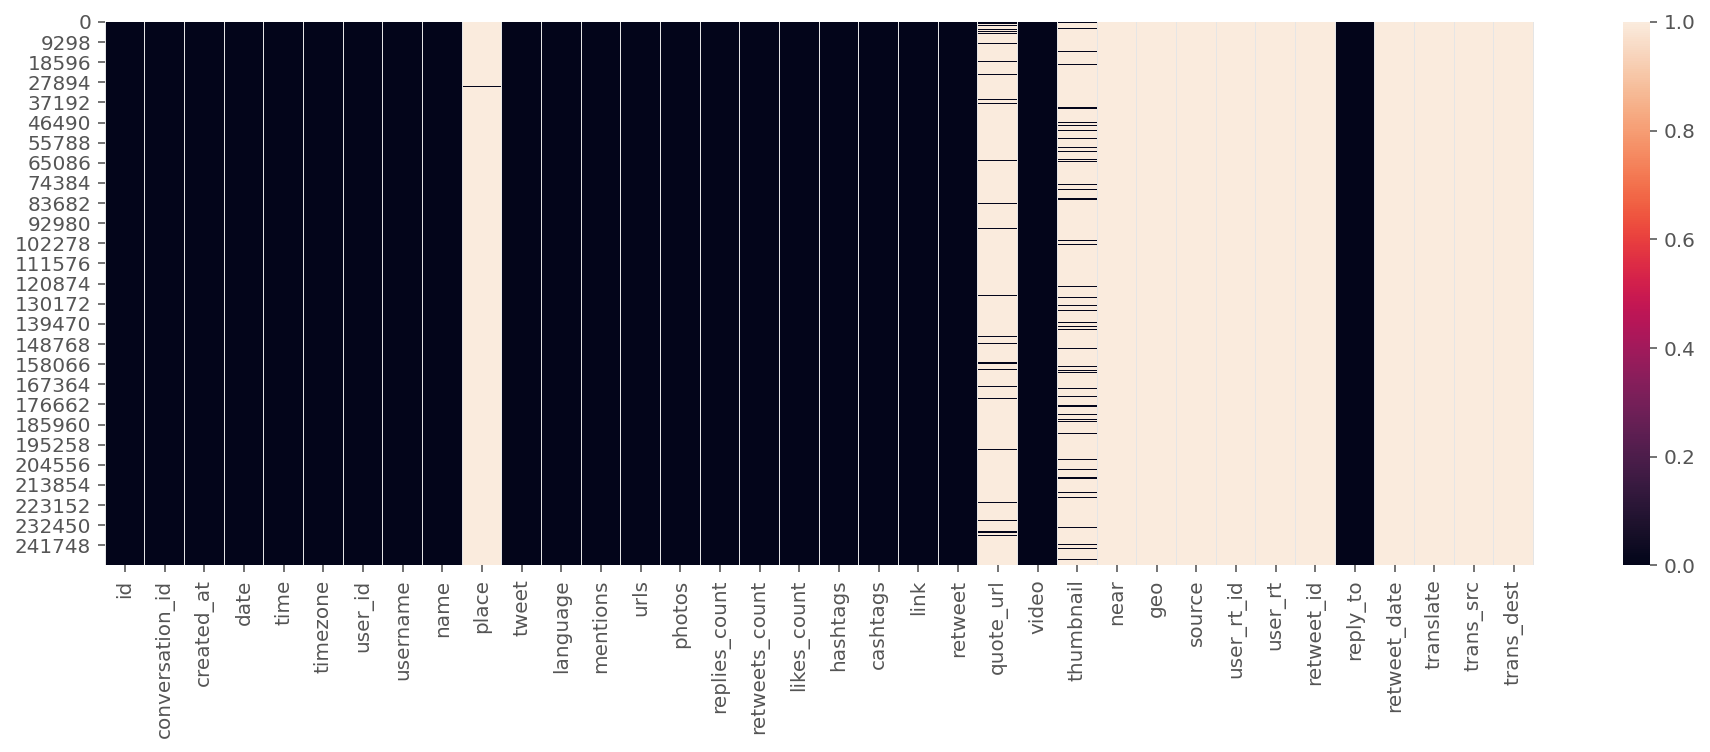

In [6]:
# check for null value in data
plt.figure(figsize = (16,5))
sns.heatmap(df_depressive_reindex.isnull())

In [7]:
import plotly.express as px

missed = pd.DataFrame()
missed['column'] = df_depressive_reindex.columns

missed['percent'] = [round(100* df_depressive_reindex[col].isnull().sum() / len(df_depressive_reindex), 2) for col in df_depressive_reindex.columns]
missed = missed.sort_values('percent')
missed = missed[missed['percent']>0]

fig = px.bar(
    missed, 
    x='percent', 
    y="column", 
    orientation='h', 
    title='Missed values percent for every column (percent > 0)', 
    height=400, 
    width=600
)

fig.show()

In [8]:
df_depressive_reindex.corr()

id  conversation_id  timezone   user_id  replies_count  \
id               1.000000         0.014120       NaN -0.000153      -0.018102   
conversation_id  0.014120         1.000000       NaN -0.004626       0.000568   
timezone              NaN              NaN       NaN       NaN            NaN   
user_id         -0.000153        -0.004626       NaN  1.000000      -0.008893   
replies_count   -0.018102         0.000568       NaN -0.008893       1.000000   
retweets_count  -0.013032         0.000637       NaN -0.007163       0.469777   
likes_count     -0.012207         0.000711       NaN -0.010546       0.463423   
retweet               NaN              NaN       NaN       NaN            NaN   
video           -0.023875        -0.000568       NaN  0.009937       0.020730   
near                  NaN              NaN       NaN       NaN            NaN   
geo                   NaN              NaN       NaN       NaN            NaN   
source                NaN              NaN       NaN       NaN            NaN   
user_rt_id            NaN              NaN       NaN       NaN            NaN   
user_rt               NaN              NaN       NaN       NaN            NaN   
retweet_id            NaN              NaN       NaN       NaN            NaN   
retweet_date          NaN              NaN       NaN       NaN            NaN   
translate             NaN              NaN       NaN       NaN            NaN   
trans_src             NaN              NaN       NaN       NaN            NaN   
trans_dest            NaN              NaN       NaN       NaN            NaN   

                 retweets_count  likes_count  retweet     video  near  geo  \
id                    -0.013032    -0.012207      NaN -0.023875   NaN  NaN   
conversation_id        0.000637     0.000711      NaN -0.000568   NaN  NaN   
timezone                    NaN          NaN      NaN       NaN   NaN  NaN   
user_id               -0.007163    -0.010546      NaN  0.009937   NaN  NaN   
replies_count          0.469777     0.463423      NaN  0.020730   NaN  NaN   
retweets_count         1.000000     0.868256      NaN  0.013249   NaN  NaN   
likes_count            0.868256     1.000000      NaN  0.011806   NaN  NaN   
retweet                     NaN          NaN      NaN       NaN   NaN  NaN   
video                  0.013249     0.011806      NaN  1.000000   NaN  NaN   
near                        NaN          NaN      NaN       NaN   NaN  NaN   
geo                         NaN          NaN      NaN       NaN   NaN  NaN   
source                      NaN          NaN      NaN       NaN   NaN  NaN   
user_rt_id                  NaN          NaN      NaN       NaN   NaN  NaN   
user_rt                     NaN          NaN      NaN       NaN   NaN  NaN   
retweet_id                  NaN          NaN      NaN       NaN   NaN  NaN   
retweet_date                NaN          NaN      NaN       NaN   NaN  NaN   
translate                   NaN          NaN      NaN       NaN   NaN  NaN   
trans_src                   NaN          NaN      NaN       NaN   NaN  NaN   
trans_dest                  NaN          NaN      NaN       NaN   NaN  NaN   

                 source  user_rt_id  user_rt  retweet_id  retweet_date  \
id                  NaN         NaN      NaN         NaN           NaN   
conversation_id     NaN         NaN      NaN         NaN           NaN   
timezone            NaN         NaN      NaN         NaN           NaN   
user_id             NaN         NaN      NaN         NaN           NaN   
replies_count       NaN         NaN      NaN         NaN           NaN   
retweets_count      NaN         NaN      NaN         NaN           NaN   
likes_count         NaN         NaN      NaN         NaN           NaN   
retweet             NaN         NaN      NaN         NaN           NaN   
video               NaN         NaN      NaN         NaN           NaN   
near                NaN         NaN      NaN         NaN           NaN   
geo                 NaN    

Text(0.5, 1.0, 'Correlation Heatmap')

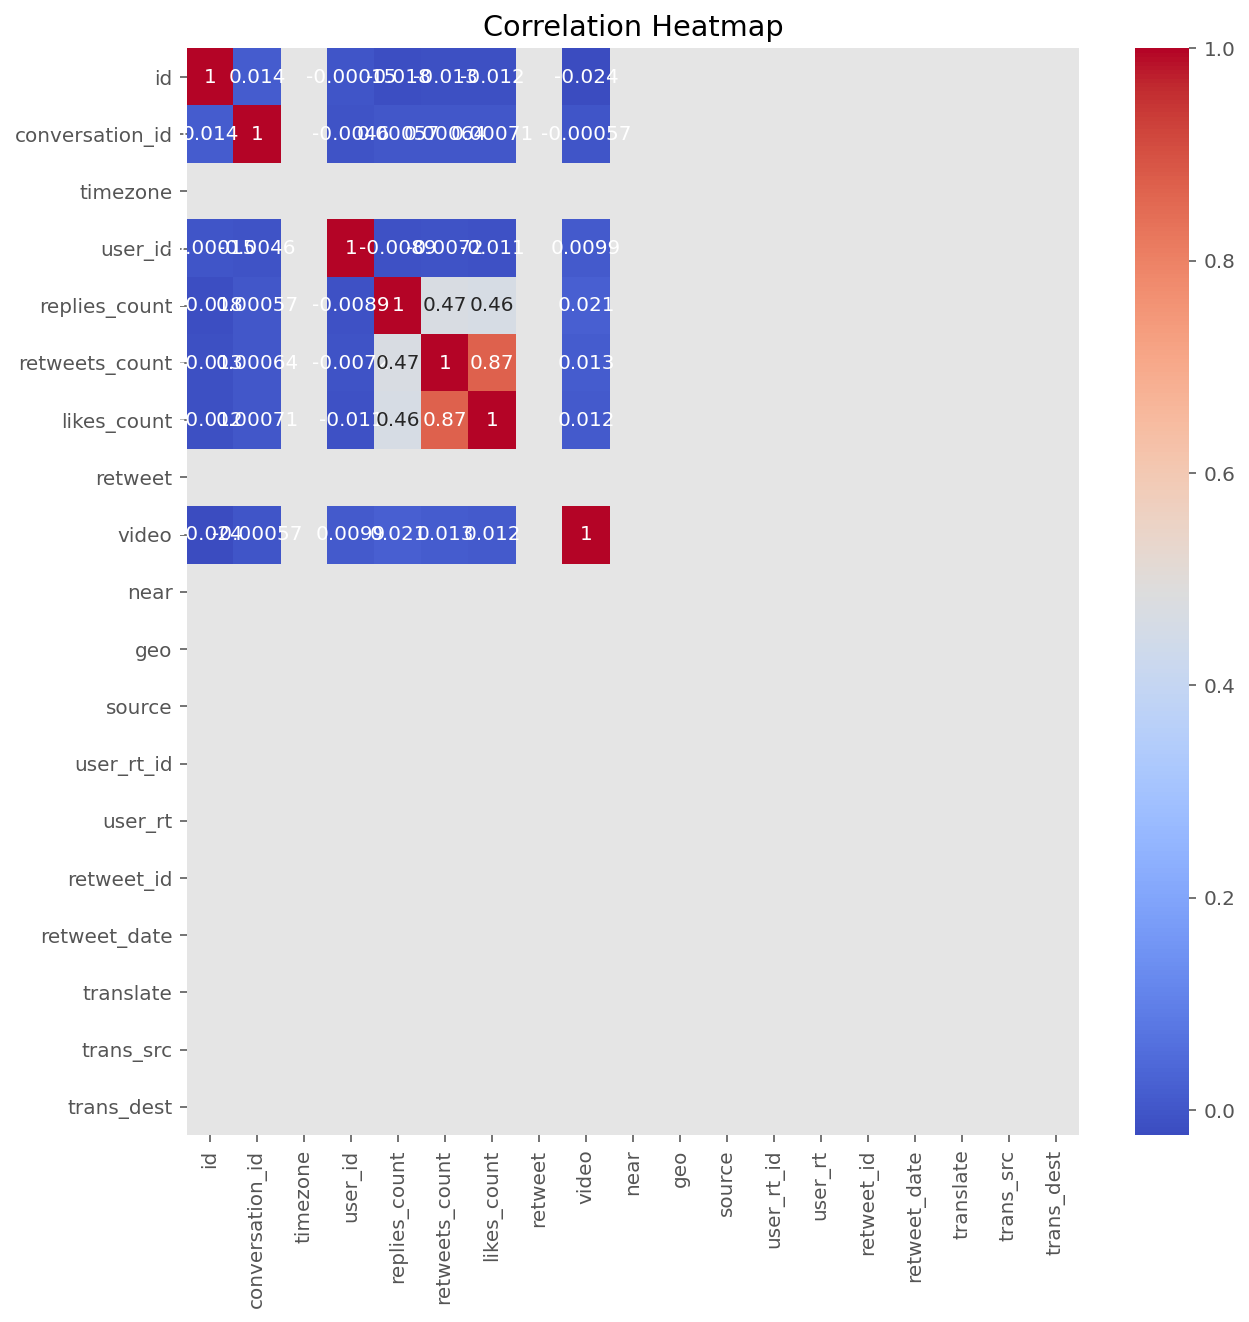

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df_depressive_reindex.corr(), annot=True, cmap="coolwarm").set_title('Correlation Heatmap')

In [10]:
df_depressive_reindex.drop(['hashtags','cashtags','thumbnail','source','user_rt','retweet_id','reply_to','retweet_date','translate','trans_src','trans_dest', 'timezone', 'name', 'created_at', 'user_id', 'place', 'likes_count', 'link', 'retweet', 'quote_url', 'video', 'user_rt_id', 'near', 'geo', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count','conversation_id'], axis = 1, inplace = True)
df_depressive_reindex.drop_duplicates()
df_depressive_reindex.head()

id        date      time        username  \
0  1372013657807290369  2021-03-17  08:05:21  msbryantimages   
1  1372013653914906625  2021-03-17  08:05:20  sharksandswain   
2  1372013644083519489  2021-03-17  08:05:18      shadic_627   
3  1372013626303778818  2021-03-17  08:05:13      evilmilkis   
4  1372013588399939584  2021-03-17  08:05:04   empressmish13   

                                               tweet language  
0  Depression will have u cryin random nite and u...       en  
1  @subtextiel an A on a test or put such a crush...       en  
2  Ghoste Menschen, die mir viel bedeuten, sobald...       de  
3  *starts feeling suicidal, depression getting w...       en  
4  @Jim_Jordan Remember those GOP tax cuts that w...       en

In [11]:
df_depressive_reindex.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251030 entries, 0 to 251029
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        251030 non-null  int64 
 1   date      251030 non-null  object
 2   time      251030 non-null  object
 3   username  251030 non-null  object
 4   tweet     251030 non-null  object
 5   language  251030 non-null  object
dtypes: int64(1), object(5)
memory usage: 11.5+ MB


c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



In [12]:
df_depressive_reindex.dtypes

id           int64
date        object
time        object
username    object
tweet       object
language    object
dtype: object

<AxesSubplot:>

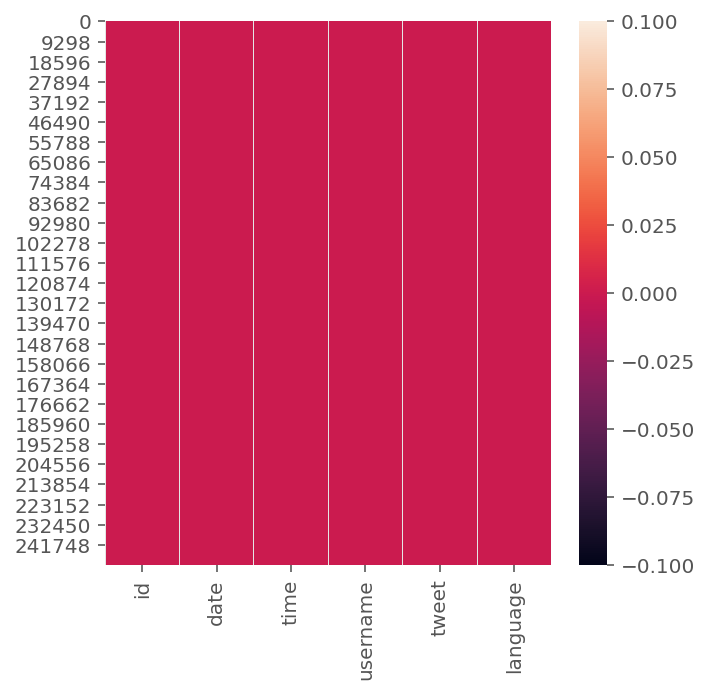

In [13]:
# check for null value in data
plt.figure(figsize = (5,5))
sns.heatmap(df_depressive_reindex.isnull())

Text(0.5, 1.0, 'Correlation Heatmap After Dropping Null Val')

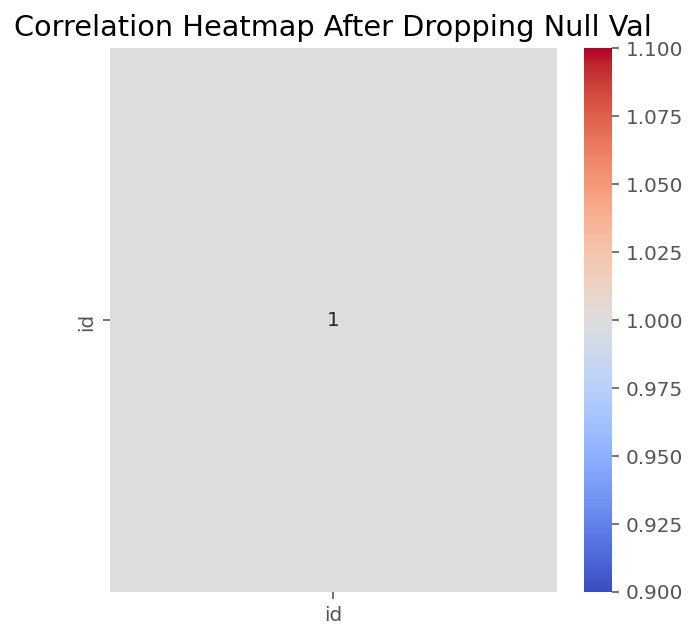

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(df_depressive_reindex.corr(), annot=True, cmap="coolwarm").set_title('Correlation Heatmap After Dropping Null Val')

In [15]:
df_english_only = df_depressive_reindex[df_depressive_reindex['language'] == 'en']
df_english_only.head()

id        date      time        username  \
0  1372013657807290369  2021-03-17  08:05:21  msbryantimages   
1  1372013653914906625  2021-03-17  08:05:20  sharksandswain   
3  1372013626303778818  2021-03-17  08:05:13      evilmilkis   
4  1372013588399939584  2021-03-17  08:05:04   empressmish13   
5  1372013584499290118  2021-03-17  08:05:03      andiepabon   

                                               tweet language  
0  Depression will have u cryin random nite and u...       en  
1  @subtextiel an A on a test or put such a crush...       en  
3  *starts feeling suicidal, depression getting w...       en  
4  @Jim_Jordan Remember those GOP tax cuts that w...       en  
5  I mean Matt's depression beard says it all. #A...       en

In [16]:
df_english_only.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222038 entries, 0 to 251029
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        222038 non-null  int64 
 1   date      222038 non-null  object
 2   time      222038 non-null  object
 3   username  222038 non-null  object
 4   tweet     222038 non-null  object
 5   language  222038 non-null  object
dtypes: int64(1), object(5)
memory usage: 11.9+ MB


c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



In [17]:
df_depressive_reindex = pd.concat([df_english_only], ignore_index=True)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import re
import networkx as nx

import nltk
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
from nltk.util import ngrams
from nltk import bigrams
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
%config InlineBackend.figure_format = 'retina'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nimes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df_new = df_depressive_reindex[df_depressive_reindex['tweet'].notnull()]
df_new['text'] = df_new['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))
print(df_new)

                         id        date      time         username  \
0       1372013657807290369  2021-03-17  08:05:21   msbryantimages   
1       1372013653914906625  2021-03-17  08:05:20   sharksandswain   
2       1372013626303778818  2021-03-17  08:05:13       evilmilkis   
3       1372013588399939584  2021-03-17  08:05:04    empressmish13   
4       1372013584499290118  2021-03-17  08:05:03       andiepabon   
...                     ...         ...       ...              ...   
222033  1371520019708981249  2021-03-15  23:23:48    hopelessblade   
222034  1371519987110744064  2021-03-15  23:23:41      131everyday   
222035  1371519939388002310  2021-03-15  23:23:29  writebernadette   
222036  1371519895104589824  2021-03-15  23:23:19  caramalkallypso   
222037  1371519888221634561  2021-03-15  23:23:17  ch4mpagnemamiii   

                                                    tweet language  \
0       Depression will have u cryin random nite and u...       en   
1       @subtextiel

In [20]:
#Remove Urls and HTML links
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
df_new['text']=df_new['text'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df_new['text']=df_new['text'].apply(lambda x:remove_html(x))

# Lower casing
def lower(text):
    low_text= text.lower()
    return low_text
df_new['text']=df_new['text'].apply(lambda x:lower(x))

# Number removal
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
df_new['text']=df_new['text'].apply(lambda x:remove_num(x))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
df_new['text']=df_new['text'].apply(lambda x:punct_remove(x))

def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
df_new['text']=df_new['text'].apply(lambda x:remove_mention(x))

def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
df_new['text']=df_new['text'].apply(lambda x:remove_hash(x))


#Remove extra white space left while removing stuff
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
df_new['text']=df_new['text'].apply(lambda x:remove_space(x))

###########################################################################################################

'''
def clean(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)  
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r'@\w+','',text)
    text = re.sub(r'#\w+','',text)
    return text   
df_new['text'] = df_new['text'].apply(lambda x:clean(x))
'''

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(df_new['text'])):
    
    score = analyser.polarity_scores(df_new['text'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df_new['sentiment']=pd.Series(np.array(sentiment))

In [21]:
df_new.head()

id        date      time        username  \
0  1372013657807290369  2021-03-17  08:05:21  msbryantimages   
1  1372013653914906625  2021-03-17  08:05:20  sharksandswain   
2  1372013626303778818  2021-03-17  08:05:13      evilmilkis   
3  1372013588399939584  2021-03-17  08:05:04   empressmish13   
4  1372013584499290118  2021-03-17  08:05:03      andiepabon   

                                               tweet language  \
0  Depression will have u cryin random nite and u...       en   
1  @subtextiel an A on a test or put such a crush...       en   
2  *starts feeling suicidal, depression getting w...       en   
3  @Jim_Jordan Remember those GOP tax cuts that w...       en   
4  I mean Matt's depression beard says it all. #A...       en   

                                                text sentiment  
0    depression u cryin random nite u dont even know  Negative  
1  subtextiel a test put crushing weight successf...  Negative  
2  starts feeling suicidal depression getting wor...  Negative  
3  jim_jordan remember gop tax cuts supposed tric...  Negative  
4  i mean matts depression beard says all afterth...  Negative

(-0.5, 399.5, 199.5, -0.5)

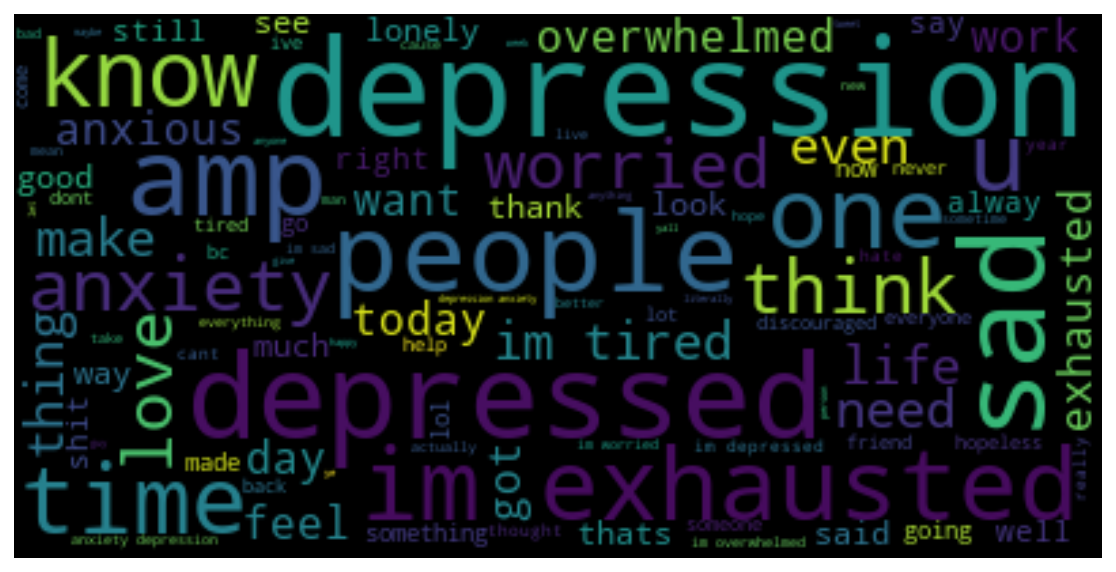

In [22]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

tweet_All = " ".join(review for review in df_new.text)


fig, ax = plt.subplots(1, 1, figsize  = (16,5))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

In [23]:
df_new['text']

0           depression u cryin random nite u dont even know
1         subtextiel a test put crushing weight successf...
2         starts feeling suicidal depression getting wor...
3         jim_jordan remember gop tax cuts supposed tric...
4         i mean matts depression beard says all afterth...
                                ...                        
222033                              he looks like pennywise
222034    after happened lost source happiness i cried e...
222035    kfoxx_writes i always start dream casting mc s...
222036    egosshadow i couldnt focus tbh its like people...
222037    im probably gonna cry tha shit future man ctfu...
Name: text, Length: 222038, dtype: object

In [24]:
temp = df_new.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

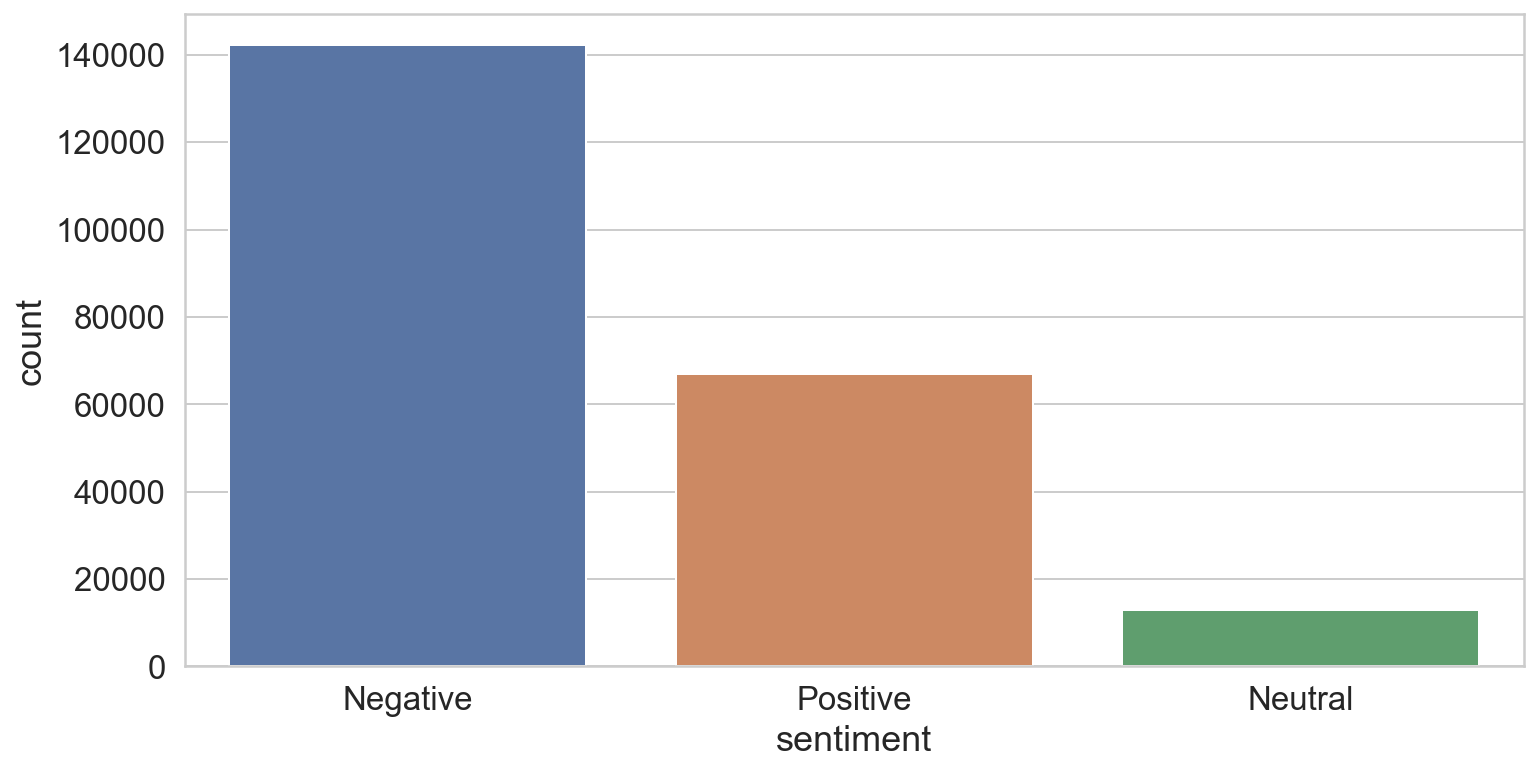

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df_new)

In [26]:
import plotly.graph_objs as go

fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

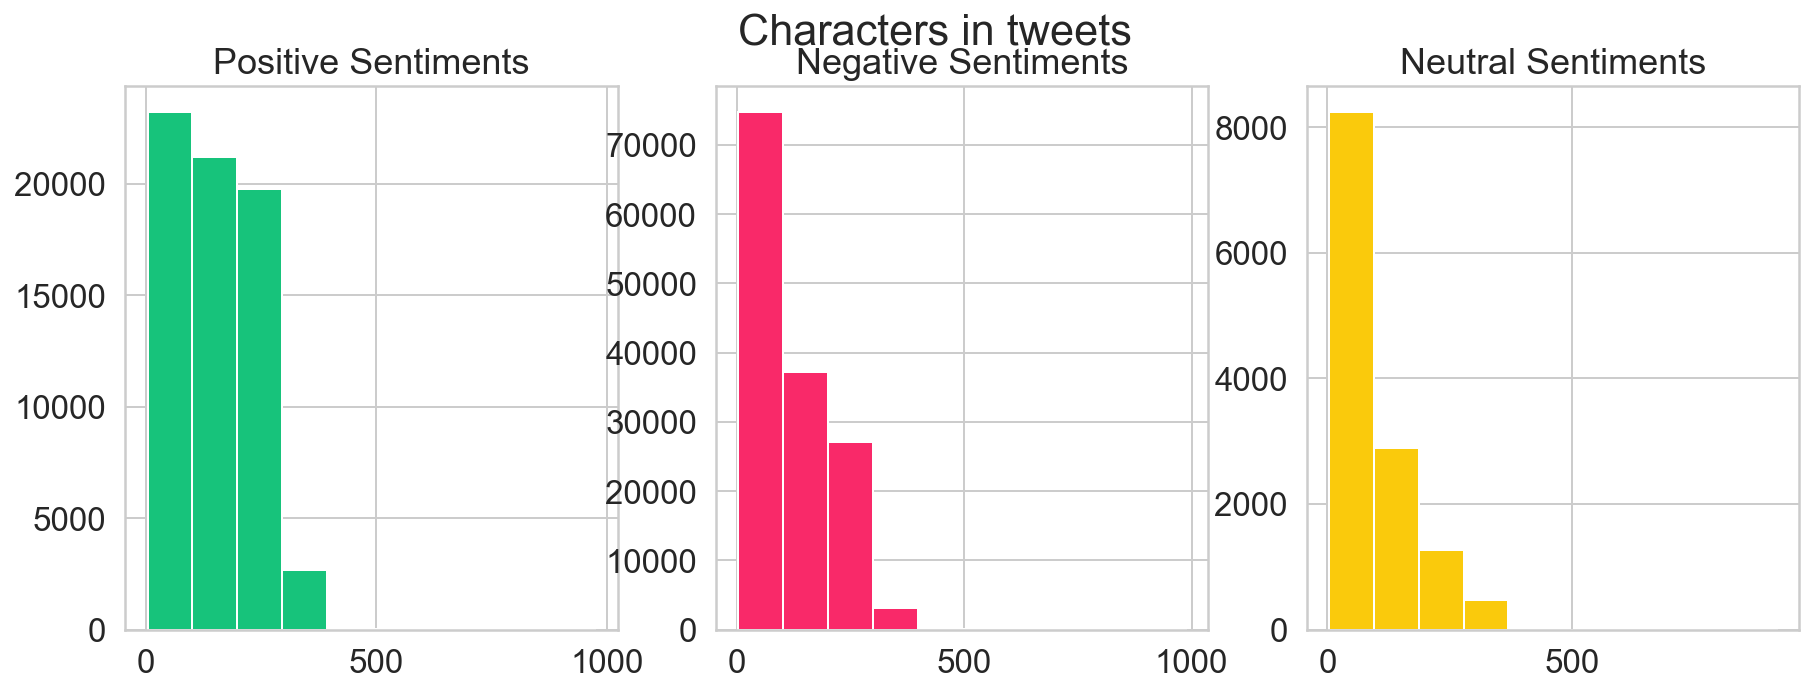

In [27]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

tweet_len=df_new[df_new['sentiment']=="Positive"]['tweet'].str.len()
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')

tweet_len=df_new[df_new['sentiment']=="Negative"]['tweet'].str.len()
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')

tweet_len=df_new[df_new['sentiment']=="Neutral"]['tweet'].str.len()
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Characters in tweets')
plt.show()

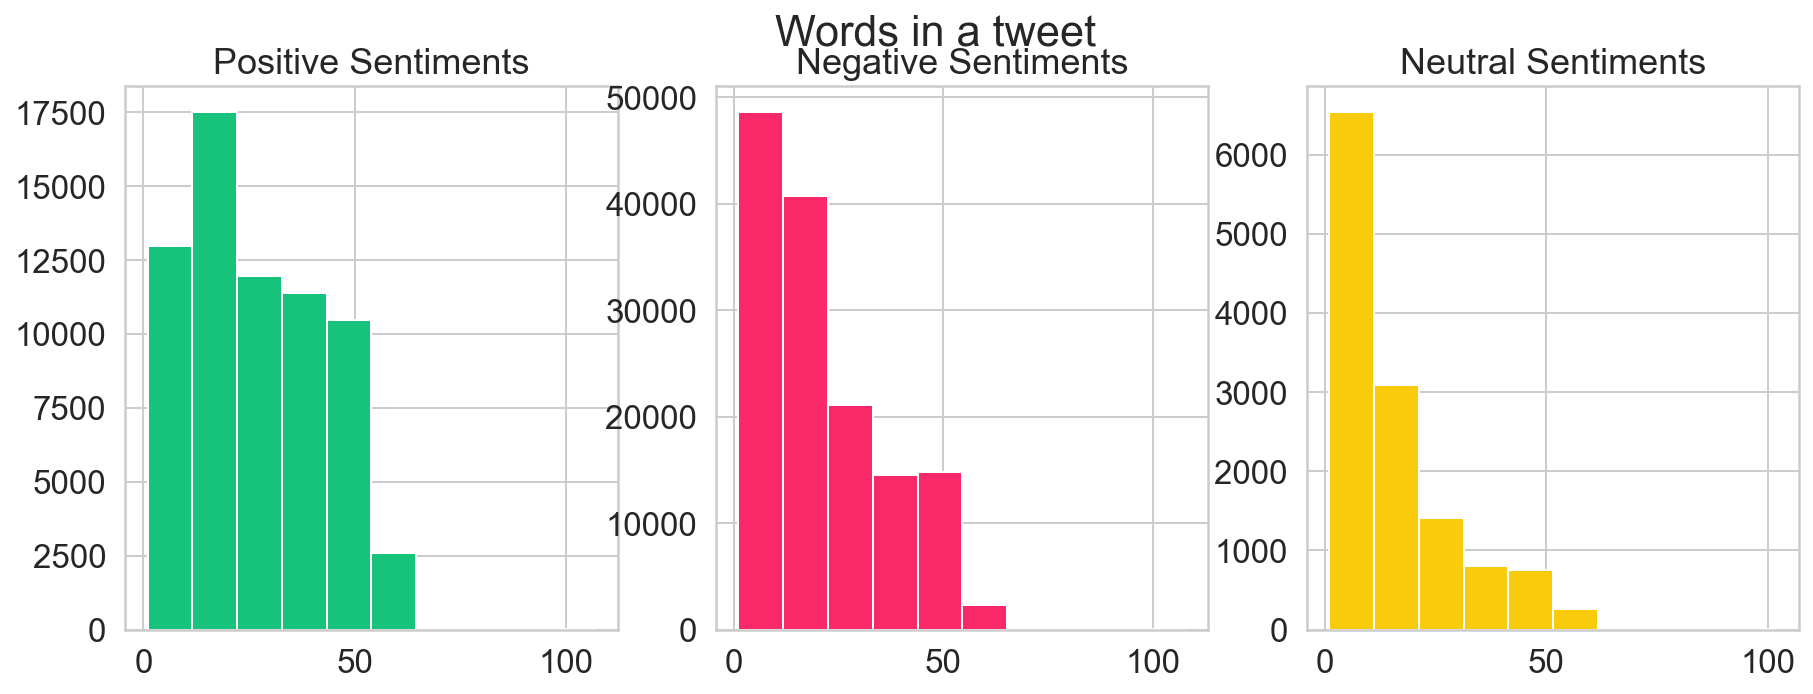

In [28]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

tweet_len=df_new[df_new['sentiment']=="Positive"]['tweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')


tweet_len=df_new[df_new['sentiment']=="Negative"]['tweet'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')

tweet_len=df_new[df_new['sentiment']=="Neutral"]['tweet'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Words in a tweet')
plt.show()


Text(0.5, 0.98, 'Average word length in each tweet')

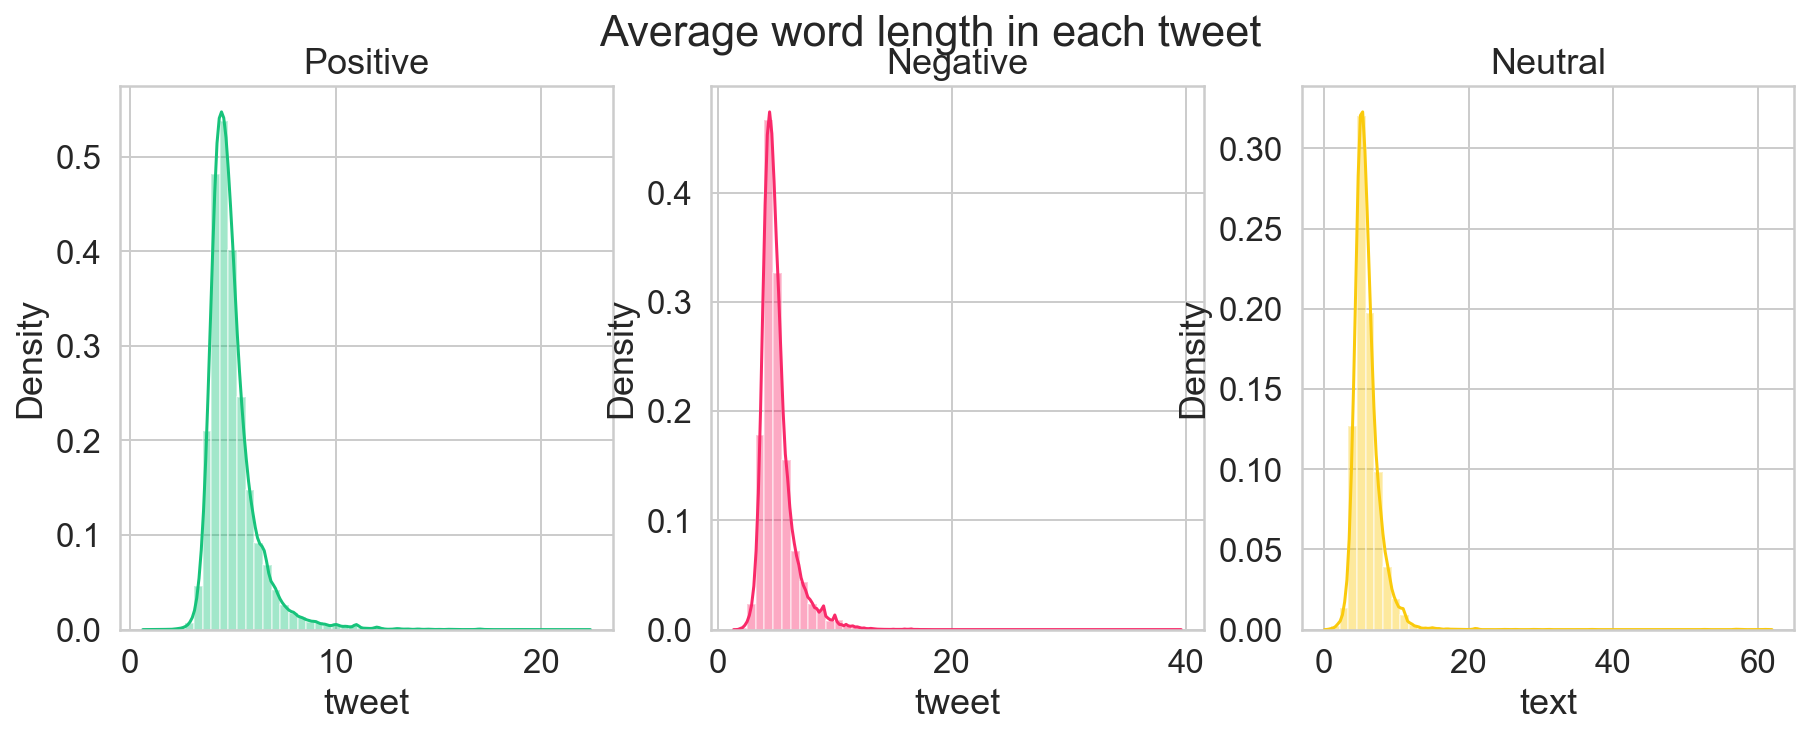

In [29]:
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(15,5))

word=df_new[df_new['sentiment']=="Positive"]['tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='#17C37B')
ax1.set_title('Positive')


word=df_new[df_new['sentiment']=="Negative"]['tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='#F92969')
ax2.set_title('Negative')

word=df_new[df_new['sentiment']=="Neutral"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='#FACA0C')
ax3.set_title('Neutral')


fig.suptitle('Average word length in each tweet')

In [30]:
def create_corpus(target):
    corpus=[]
    
    for x in df_new[df_new['sentiment']==target ]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus


In [31]:
np.array(stopwords)

array({'no', 'when', 'we', "won't", "you're", "she's", 'few', 'hasn', 'shouldn', 'not', 'himself', 'only', 'mightn', 'ours', 'themselves', 'the', 'herself', 'do', 'itself', 'own', 'd', 'there', 'm', 'just', 'while', 'ain', "that'll", 'theirs', 'until', 'yours', 'very', 'how', "mustn't", 'but', 'will', 'i', "didn't", 'be', 'our', 'most', 'mustn', 'so', 'your', 'during', 'aren', 'down', "it's", 'having', 'here', "shouldn't", 'is', 'out', 'all', 'these', 'been', 'wouldn', 'am', 'against', 'at', 'yourselves', 'such', 'same', "haven't", "hasn't", 'has', 'myself', 'didn', 'was', 'they', 'too', "couldn't", 'its', 'because', 'those', 'you', 'about', 'more', 'ourselves', 'that', "you'd", 'below', 'under', "don't", 'needn', 've', 'before', 'any', 'shan', 'for', 'by', "should've", 'both', 'don', "aren't", 'her', 'to', 'after', 's', 'again', 'couldn', 'him', 'can', 'further', 'an', "mightn't", 'each', "hadn't", 'does', 'which', 'some', "weren't", 'hadn', 'whom', 'on', 'other', 'above', 't', 'or', 

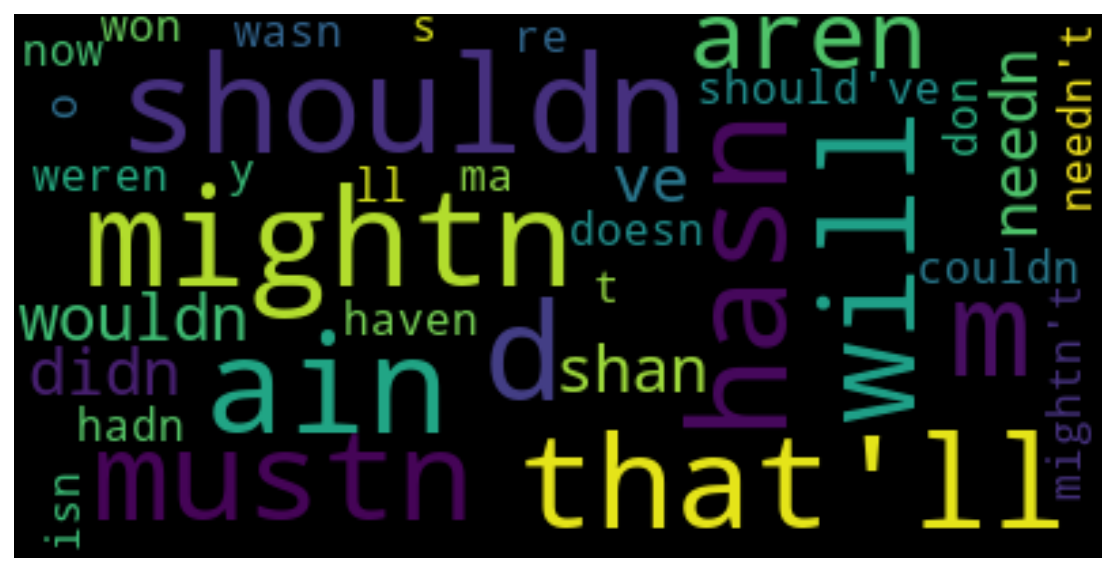

In [32]:
comment_words = '' 
stopwords1 = set(STOPWORDS) 
  
for val in stopwords: 
      
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
fig, ax = plt.subplots(1, 1, figsize  = (16,5))
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(comment_words)



# plot the WordCloud image                        
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.axis('off')
  
plt.show() 


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])

df_pos = df_new[df_new["sentiment"]=="Positive"]
df_neg = df_new[df_new["sentiment"]=="Negative"]
df_neu = df_new[df_new["sentiment"]=="Neutral"]

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df_pos.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in df_neg.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Reds",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);

comment_words = ''
for val in df_neu.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greys",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutal Sentiment',fontsize=35);

In [ ]:
from collections import defaultdict

# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 30


positive= df_new["sentiment"]== "Positive"
negative= df_new["sentiment"]== "Negative"
neutral= df_new["sentiment"]== "Neutral"

positive_unigrams = defaultdict(int)
neutral_unigrams = defaultdict(int)
negative_unigrams = defaultdict(int)

# Unigrams
for tweet in df_new[positive]['text']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1
        
for tweet in df_new[negative]['text']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1
        
for tweet in df_new[neutral]['text']:
    for word in generate_ngrams(tweet):
        neutral_unigrams[word] += 1        
        
df_positive_unigrams = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_negative_unigrams = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])
df_neutral_unigrams = pd.DataFrame(sorted(neutral_unigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=3, figsize=(27, 30), dpi=150)
plt.tight_layout()

sns.barplot(y=df_positive_unigrams[0].values[:N], x=df_positive_unigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_unigrams[0].values[:N], x=df_negative_unigrams[1].values[:N], ax=axes[1], color='#F92969')
sns.barplot(y=df_neutral_unigrams[0].values[:N], x=df_neutral_unigrams[1].values[:N], ax=axes[2], color='#FACA0C')


for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=30)

axes[0].set_title(f'Top {N} most common unigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Negative Tweets', fontsize=15)
axes[2].set_title(f'Top {N} most common unigrams in Neutral Tweets', fontsize=15)

plt.show()

In [ ]:
# Bigrams
positive_bigrams = defaultdict(int)
neutral_bigrams = defaultdict(int)
negative_bigrams = defaultdict(int)

for tweet in df_new[positive]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        positive_bigrams[word] += 1
        
for tweet in df_new[negative]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        negative_bigrams[word] += 1
        
for tweet in df_new[neutral]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        neutral_bigrams[word] += 1        
        
df_positive_bigrams = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_negative_bigrams = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])
df_neutral_bigrams = pd.DataFrame(sorted(neutral_bigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=3, figsize=(27, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_bigrams[0].values[:N], x=df_positive_bigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_bigrams[0].values[:N], x=df_negative_bigrams[1].values[:N], ax=axes[1], color='#F92969')
sns.barplot(y=df_neutral_bigrams[0].values[:N], x=df_neutral_bigrams[1].values[:N], ax=axes[2], color='#FACA0C')


for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=30)

axes[0].set_title(f'Top {N} most common bigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Negative Tweets', fontsize=15)
axes[2].set_title(f'Top {N} most common bigrams in Neutral Tweets', fontsize=15)

plt.show()

In [ ]:
# Trigrams
positive_trigrams = defaultdict(int)
neutral_trigrams = defaultdict(int)
negative_trigrams = defaultdict(int)

for tweet in df_new[positive]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        positive_trigrams[word] += 1
        
for tweet in df_new[negative]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        negative_trigrams[word] += 1
        
for tweet in df_new[neutral]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        neutral_trigrams[word] += 1        
        
df_positive_trigrams = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_negative_trigrams = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])
df_neutral_trigrams = pd.DataFrame(sorted(neutral_trigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=3, figsize=(27, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_trigrams[0].values[:N], x=df_positive_trigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_trigrams[0].values[:N], x=df_negative_trigrams[1].values[:N], ax=axes[1], color='#F92969')
sns.barplot(y=df_neutral_trigrams[0].values[:N], x=df_neutral_trigrams[1].values[:N], ax=axes[2], color='#FACA0C')




for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=30)

axes[0].set_title(f'Top {N} most common trigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Negative Tweets', fontsize=15)
axes[2].set_title(f'Top {N} most common trigrams in Neutral Tweets', fontsize=15)

plt.show()

In [ ]:
df_new.head()

In [ ]:
df_negative_only = df_new[df_new['sentiment'] == 'Negative']
df_negative_only.head()

In [ ]:
df_negative_only['label'] = df_negative_only['sentiment'].replace("Negative",0)
df_negative_only = pd.concat([df_negative_only], ignore_index=True)

In [ ]:
df_negative_only.head()

In [ ]:
df_negative_only.info(null_counts=True)

In [ ]:
df_negative_only = df_negative_only.drop_duplicates()
len(df_negative_only)

In [ ]:
#As words are in the order of csv files we imported , we have to shuffle the rows
df_negative_only = df_negative_only.sample(frac=1).reset_index(drop=True)
df_negative_only.head()

In [ ]:
df_negative_only.info(null_counts=True)

In [ ]:
del df_negative_only["sentiment"]
del df_negative_only["text"]

In [ ]:
df = df_negative_only[['label','tweet']]
df.head()

In [ ]:
df_neg = pd.concat([df.iloc[0:100000]])
len(df_neg)

In [ ]:
export_csv = df_neg.to_csv(r'labeled depressive tweets.csv')